In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy import signal

# Sprzężone oscylatory

In [ ]:
omega1 = 2
omega2 = 3
tmax = 3*np.pi

In [ ]:
print(f'Stosunek częstości: {omega1/omega2}')
dtheta1 = omega1 #Faza Thety#
dtheta2 = omega2

Stosunek częstości: 0.6666666666666666


In [ ]:
k1 = 3.0 #*coupling constants*#
k2 = 2.5
omega1 = 5 + np.sqrt(np.pi)
omega2 = 1
tmax = 3*np.pi
kk = k1+k2

dtheta1 = lambda theta1, theta2: omega1 + k1*np.sin(theta2 - theta1)
dtheta2 = lambda theta1, theta2: omega2 + k2*np.sin(theta1 - theta2)

In [ ]:
print(f'Stosunek częstości: {np.round(omega1/omega2,3)}')

Stosunek częstości: 6.772


In [ ]:
def func(z,t):
    th1, th2 = z # theta1, theta2
    return [dtheta1(th1,th2), dtheta2(th1,th2)]   

z0=[0,1]
t = np.linspace(0,tmax,1000)
# print(max(t))
XX = odeint(func, z0, t)
theta1 = XX[:, 0]
theta2 = XX[:, 1]
# print(xx)

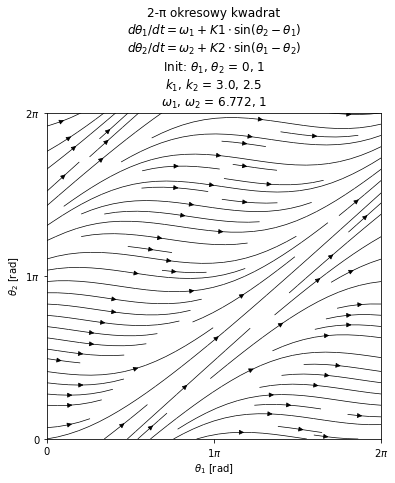

In [ ]:
x = np.linspace(0, 2*np.pi,360)
y = np.linspace(0, 2*np.pi,360)
X, Y = np.meshgrid(x, y)
U = dtheta1(X,Y)
V = dtheta2(X,Y)
fig, ax = plt.subplots(1,figsize = (6, 6))
plt.streamplot(X, Y, U, V, density = 1, linewidth=0.7, color='black')
period = 1
x=np.array([])
y=np.array([])
addval = lambda period, arr, x: arr + x-2*np.pi*period 
period = 2*np.pi
linetheta1lim = []
linetheta2lim = [] 

theta1lim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in theta1] 
theta2lim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in theta2] 
theta1win = [0]
theta2win = []
xwin = 0 
ywin = 0

for i in range(len(theta1)):
    if np.floor(theta1[i]/period)!=xwin:
      theta1win=theta1win + [i]
      xwin = xwin + 1

for j in range(len(theta1)):
    if np.floor(theta2[j]/period)!=ywin:
      theta2win=theta2win + [j]
      ywin = ywin + 1

thetawin = sorted(theta1win+theta2win) # points where points touch 2*pi on x and y axis

col = np.arange(len(thetawin))

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.title(f'2-π okresowy kwadrat\n$dθ_1/dt=ω_1+K1 \cdot \sin(θ_2-θ_1)$\n$dθ_2/dt=ω_2+K2 \cdot \sin(θ_1-θ_2)$\nInit: $θ_1$, $θ_2$ = {z0[0]}, {z0[1]}\n$k_1$, $k_2$ = {k1}, {k2}\n$ω_1$, $ω_2$ = {np.round(omega1,3)}, {np.round(omega2,3)}')
plt.xlabel('$θ_1$ [rad]')
plt.ylabel('$θ_2$ [rad]')
plt.savefig(f'2pi_t1_{z0[0]}_t2_{z0[0]}_k1_{k1}_k2_{k2}_om1_{np.round(omega1,3)}_om2_{np.round(omega2,3)}.png')
plt.show()

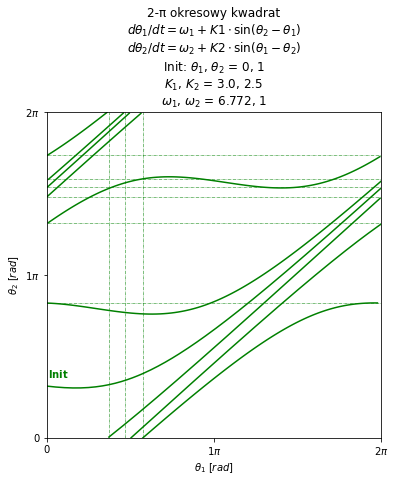

In [ ]:
fig, ax = plt.subplots(1,figsize = (6, 6))
for i in range(0,len(thetawin)):
  if i+1 >= len(thetawin):
    break 
  plt.plot(theta1lim[thetawin[i]:thetawin[i+1]], theta2lim[thetawin[i]:thetawin[i+1]],c='g')
for j in range(1,len(theta1win)):
  plt.axhline(theta2lim[theta1win[j]],ls='-.',lw=0.5,c='green') #plot_color_gradients
for j in range(1,len(theta2win)):
  plt.axvline(theta1lim[theta2win[j]],ls='-.',lw=0.5,c='green')


plt.annotate('$\\bfInit$', # this is the text
                 (theta1lim[0],theta2lim[0]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,8), # distance from text to points (x,y)
                 ha='center',
                 color='green') # horizontal alignment can be left, right or center
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.title(f'2-π okresowy kwadrat\n$dθ_1/dt=ω_1+K1 \cdot \sin(θ_2-θ_1)$\n$dθ_2/dt=ω_2+K2 \cdot \sin(θ_1-θ_2)$\nInit: $θ_1$, $θ_2$ = {z0[0]}, {z0[1]}\n$K_1$, $K_2$ = {k1}, {k2}\n$ω_1$, $ω_2$ = {np.round(omega1,3)}, {np.round(omega2,3)}')
plt.xlabel('$θ_1$ $[rad]$')
plt.ylabel('$θ_2$ $[rad]$')
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
plt.savefig(f'2pi_t1_{z0[0]}_t2_{z0[0]}_k1_{k1}_k2_{k2}_om1_{np.round(omega1,3)}_om2_{np.round(omega2,3)}_simple.png')
plt.show()

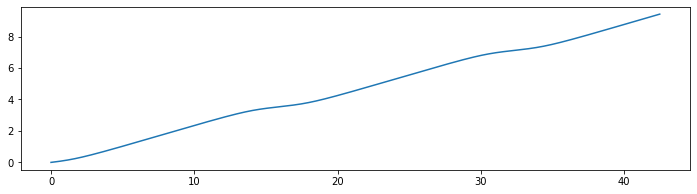

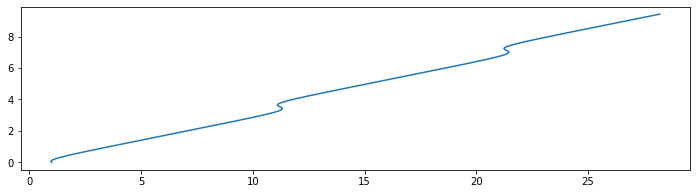

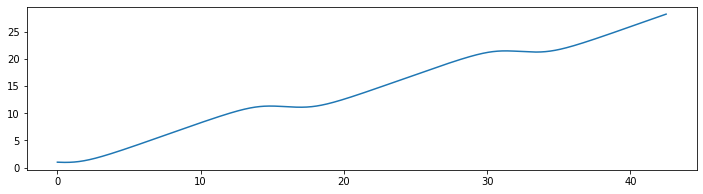

In [ ]:
plt.plot(theta1, t)
plt.show()
plt.plot(theta2, t)
plt.show()
plt.plot(theta1, theta2)
plt.show()

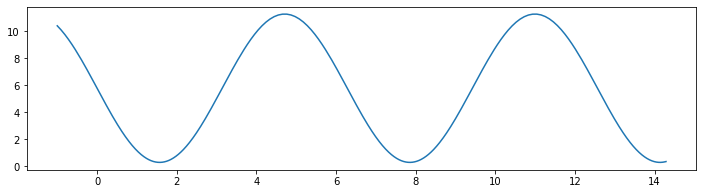

In [ ]:
phasediff = theta1-theta2
dphase = omega1-omega2-(k1+k2)*np.sin(phasediff)
plt.plot(phasediff,dphase)
plt.show()

#Kopany Rotator

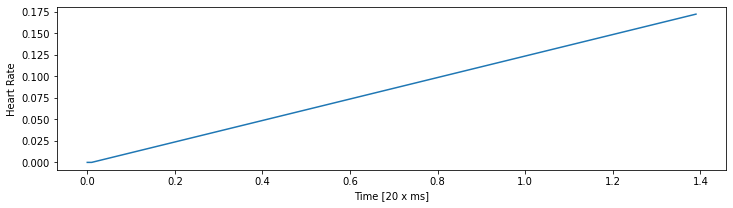

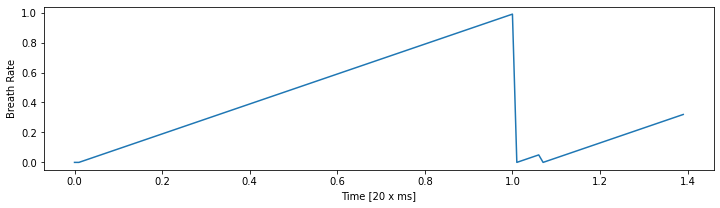

In [ ]:
from pylab import *
%matplotlib inline
rcParams['figure.figsize']=(12,3) # Change the default figure size

class coupledOscillator:
  def __init__(self, heart_ratio, breath_ratio, threshold, Vreset, Vtau, Wtau, dt, length, V_kick, W_kick):
    self.heart_ratio = heart_ratio
    self.breath_ratio = breath_ratio
    self.threshold = threshold                 
    self.Vreset = threshold       
    self.Wreset = Vreset          
    self.Vtau = Vtau
    self.Wtau = Wtau
    self.dt=dt
    self.length = length             
    self.V = zeros([self.length*2,1])
    self.W = zeros([self.length*2,1])    
    self.V_kick = V_kick
    self.W_kick = W_kick           
    self.V[0]=0.0;           
    self.V_reset = np.array([]).astype(int)
    self.W_reset = np.array([]).astype(int)
    self.V_kicked = np.array([]).astype(int)
    self.W_kicked = np.array([]).astype(int)

  def run(self):
    for k in range(1,self.length-1):       

        if k not in self.V_kicked:
          self.V[k+1] = self.V[k] + self.dt*1/self.heart_ratio     
        if k not in self.W_kicked: 
          self.W[k+1] = self.W[k] + self.dt*1/self.breath_ratio   

        if self.V[k+1] > self.threshold:         
          self.V[k+1] = self.Vreset
          self.W[k+1+self.Wtau] = self.W[k+1+self.Wtau]+self.W_kick
          self.V_reset = np.append(self.V_reset,k)
          self.V_kicked = np.append(self.V_kicked,k+1+self.Wtau)

        if self.W[k+1] > self.threshold:
          self.W[k+1]= self.Wreset
          self.V[k+1+self.Vtau] = self.V[k+1+self.Wtau]+self.V_kick
          self.W_reset = np.append(self.W_reset,k)
          self.W_kicked = np.append(self.W_kicked,k+1+self.Vtau)

        if self.V[k+1] > self.threshold:    
          self.V[k+1] = self.Vreset + self.V_kick

        if self.W[k+1] > self.threshold:    
          self.W[k+1] = self.Wreset + self.W_kick

    self.V = self.V[:int(len(self.V)/2)]
    self.W = self.W[:int(len(self.W)/2)]
    tV = arange(0,len(self.V))*self.dt 
    tW = arange(0,len(self.W))*self.dt  
    return self.V, self.W, tV, tW

  def dW_(self, t):
    return double(self.V[int(t)])

  def dV_(self, t):
    return double(self.W[int(t)])

  def dW1(self, t):
    return self.V[t]

  def dV1(self, t):
    return self.W[t]

heart_ratio = 8
breath_ratio = 1
threshold = 1;                 
Vreset = 0;     
Wreset=Vreset            
Vtau = 5
Wtau = 10
dt=0.01   
length = 140              
V_kick = 1
W_kick = 1           

co = coupledOscillator(heart_ratio, breath_ratio, threshold, Vreset, Vtau, Wtau, dt, length, V_kick, W_kick)
V1, W1, tV, tW = co.run()

figure()                     
plt.plot(tV,V1)
plt.xlabel('Time [20 x ms]')
plt.ylabel('Heart Rate');
plt.show()
plt.plot(tW,W1)
plt.xlabel('Time [20 x ms]')
plt.ylabel('Breath Rate');
plt.show()

def funct(z,t):
    # th1, th2 = z # theta1, theta2
    return co.dV_(t), co.dW_(t) 

z0=[0,1]
t = np.arange(0,length-10,1)
XX = odeint(funct, z0, t)
V = XX[:, 0]
W = XX[:, 1]

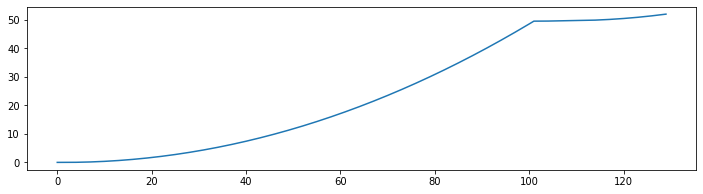

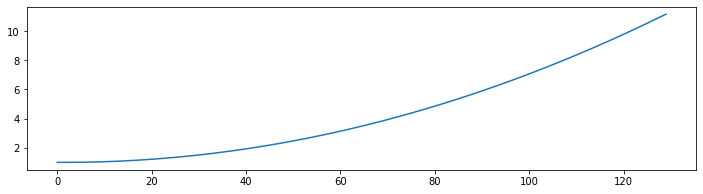

In [ ]:
plt.plot(V)
plt.show()
plt.plot(W)
plt.show()

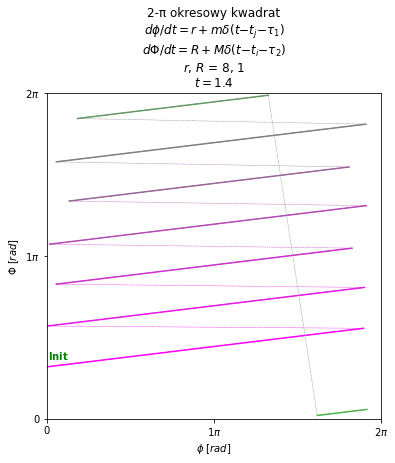

In [ ]:
X, Y = np.meshgrid(t, t)
Z = co.dV1(X)[:, :, 0]
G = co.dV1(Y)[:, :, 0]
period = 1
x=np.array([])
y=np.array([])
addval = lambda period, arr, x: arr + x-2*np.pi*period 
period = 2*np.pi
lineVlim = []
lineWlim = [] 

Vlim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in V] 
Wlim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in W] 
Vwin = [0]
Wwin = []
xwin = 0 
ywin = 0

for i in range(len(V)):
    if np.floor(V[i]/period)!=xwin:
      Vwin=Vwin + [i]
      xwin = xwin + 1

for j in range(len(W)):
    if np.floor(W[j]/period)!=ywin:
      Wwin=Wwin + [j]
      ywin = ywin + 1

thetawin = sorted(Vwin+Wwin)

fig, ax = plt.subplots(1,figsize = (6, 6))

for i in range(0,len(thetawin)):
  if i+2 >= len(thetawin): 
    break 
  plt.plot(Vlim[thetawin[i]:thetawin[i+1]], Wlim[thetawin[i]:thetawin[i+1]],c=(1/len(thetawin)*(len(thetawin)-i),1/len(thetawin)*i,1/len(thetawin)*(len(thetawin)-i)))
  if i<len(thetawin)-3:
    plt.plot(Vlim[thetawin[i]:thetawin[i+2]], Wlim[thetawin[i]:thetawin[i+2]],ls='--',lw=0.45,c=(1/len(thetawin)*(len(thetawin)-i),1/len(thetawin)*i,1/len(thetawin)*(len(thetawin)-i)))

plt.annotate('$\\bfInit$', 
                 (Vlim[0],Wlim[0]), 
                 textcoords="offset points", 
                 xytext=(12,8), 
                 ha='center',
                 color='green') 
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.title(f'2-π okresowy kwadrat\n$dϕ/dt=r+ mδ(t − t_j − τ_1)$\n$dΦ/dt=R+ Mδ(t − t_i − τ_2)$\n$r$, $R$ = {heart_ratio}, {breath_ratio}\n$t={np.round(length*dt,3)}$')
plt.xlabel('$ϕ$ $[rad]$')
plt.ylabel('$Φ$ $[rad]$')
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
# plt.savefig(f'2pi_t1_{z0[0]}_t2_{z0[0]}_k1_{k1}_k2_{k2}_om1_{np.round(omega1,3)}_om2_{np.round(omega2,3)}_simple.png')
plt.show()